In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 03:29:39,571] A new study created in memory with name: no-name-d3474696-0df6-4d5e-8200-5c2a66837209
[I 2025-04-27 03:29:44,575] Trial 0 finished with value: 0.9722323049001815 and parameters: {'n_estimators': 3895, 'learning_rate': 0.0013335545552120357, 'num_leaves': 32, 'max_depth': 3, 'min_child_samples': 37, 'subsample': 0.857315258834233, 'colsample_bytree': 0.8742233344630979, 'reg_alpha': 6.745061869693143e-07, 'reg_lambda': 1.0565829053816427e-06}. Best is trial 0 with value: 0.9722323049001815.
[I 2025-04-27 03:29:51,245] Trial 1 finished with value: 0.9616454930429521 and parameters: {'n_estimators': 6045, 'learning_rate': 0.0027099093715726268, 'num_leaves': 78, 'max_depth': 10, 'min_child_samples': 23, 'subsample': 0.6630710936808082, 'colsample_bytree': 0.5181241405225834, 'reg_alpha': 0.4427550223642647, 'reg_lambda': 1.0857719747564719e-08}. Best is trial 0 with value: 0.9722323049001815.
[I 2025-04-27 03:29:52,098] Trial 2 finished with value: 0.9790683605

Best trial:
Accuracy: 0.9860859044162129
Best hyperparameters:  {'n_estimators': 5983, 'learning_rate': 0.16987122500254895, 'num_leaves': 66, 'max_depth': 6, 'min_child_samples': 65, 'subsample': 0.592741010669118, 'colsample_bytree': 0.5007409285200358, 'reg_alpha': 0.26609512733708807, 'reg_lambda': 7.062011050599616e-08}


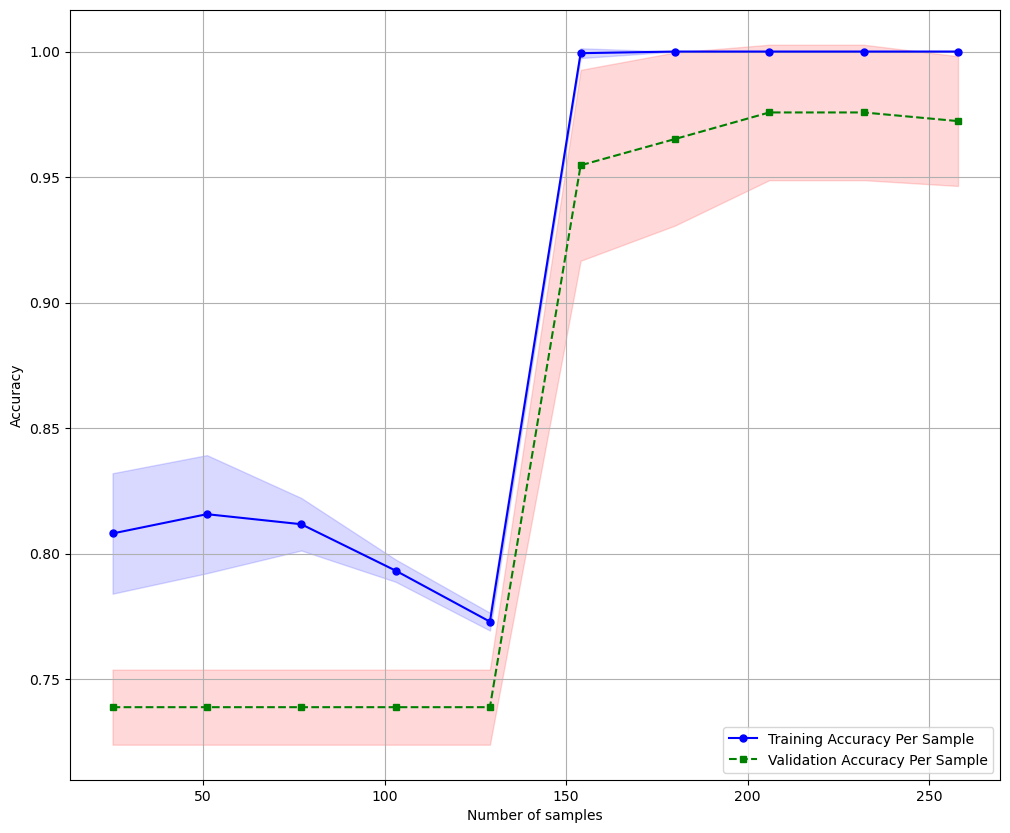

Confusion Matrix
[[ 59   5]
 [  1 106]]
Accuracy: 0.9649, Precision: 0.9550, Recall: 0.9907, F1: 0.9725, AUC:0.9918


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

helper.train_and_evaluate_model('lgbm', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)